# Análise exploratória de dados

In [43]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

In [37]:
df = sns.load_dataset('mpg')
df.to_csv('../data/raw/data.csv', index = False)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição de dados

O conjunto de dados `"mpg" (Milhas por galão)` contém informações sobre diferentes modelos de carros e seus atributos, sendo comumente usado para investigar a relação entre características dos veículos e sua eficiência de combustível. Essas variáveis oferecem uma visão abrangente das especificações dos carros e é frequentemente utilizado em análises estatísticas e de aprendizado de máquina.

## 2.1 Dicionário de dados

In [38]:
dicionario = pd.DataFrame([
    {
        "variavel": "mpg",
        "descricao": "Milhas por galão",
        "tipo":"quantitativa",
        "subtipo":"continua"
    } , {
        "variavel": "cylinders",
        "descricao": "Quantos cilidros tem no motor",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    } , {
        "variavel": "displacement",
        "descricao": "Milhas rodadas",
        "tipo":"quantitativa",
        "subtipo":"continua"
    } , {
        "variavel": "horsepower",
        "descricao": "Quantos cavalos o motor tem",
        "tipo":"quantitativa",
        "subtipo":"continua"
    } , {
        "variavel": "weight",
        "descricao": "Quanto o carro pesa em libras",
        "tipo":"quantitativa",
        "subtipo":"continua"
    } , {
        "variavel": "acceleration",
        "descricao": "Quanto demora para fazer de 0 a 100 em segundos",
        "tipo":"quantitativa",
        "subtipo":"continua"
    } , {
        "variavel": "model_year",
        "descricao": "Ano que o carro foi fabricado",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    } , {
        "variavel": "origin",
        "descricao": "Local de fabricação",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    } , {
        "variavel": "name",
        "descricao": "Marca e nome do carro",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Milhas por galão,quantitativa,continua
1,cylinders,Quantos cilidros tem no motor,quantitativa,discreta
2,displacement,Milhas rodadas,quantitativa,continua
3,horsepower,Quantos cavalos o motor tem,quantitativa,continua
4,weight,Quanto o carro pesa em libras,quantitativa,continua
5,acceleration,Quanto demora para fazer de 0 a 100 em segundos,quantitativa,continua
6,model_year,Ano que o carro foi fabricado,quantitativa,discreta
7,origin,Local de fabricação,qualitativa,nominal
8,name,Marca e nome do carro,qualitativa,nominal


---
* São 9 variáveis, com 2 qualitativas nominais, 5 quantitativas contínuas e 2 quantitativas discretas.
---

## 3. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?
* A eficiência de combustível está correlacionada com a potência do motor nos carros?
* Existe uma relação significativa entre o número de cilindros e a potência do motor?
* Carros mais pesados tendem a ter uma aceleração mais lenta?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [39]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "\n As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

horsepower    6
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['horsepower']`contém valores faltantes. Além disso sabemos que temos `6` linhas com valores faltantes.
 As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Qual a distribuição dos dados?

In [28]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


---
* Existem 3 possiveis países de origem.
* A origem mais frequente é USA.
* O carro mais comum é Ford Pinto, aparecendo 5 vezes.
* A média de cilindros é 4, com mínimo de 3 e máximo de 8.
* A média de milhas rodadas é 151mi, com mínimo 68mi e máximo de 455mi.
* O peso dos carros varia de 1613lb a 5140lb, com média de 2803lb.
---

##### Distribuição das variáveis qualitativas

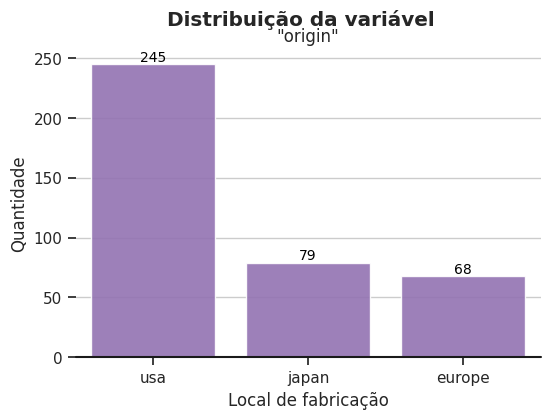

In [84]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Distribuição da variável', fontweight='bold')

# Plotar a variável "origin" com contador de valor
ax = sns.countplot(
    data=df,
    x="origin",
    color=colors[0],
        alpha=0.9,
        order=order
)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('"origin"')
plt.xlabel('Local de fabricação')
ax.set_ylabel('Quantidade')
ax.grid(axis='y', linestyle='-')

# Adicionar contador de valor em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

---
* A maior parte dos carros foram fabricados no EUA e a menor parte na Europa.
---

##### Distribuição das variáveis quantitativas

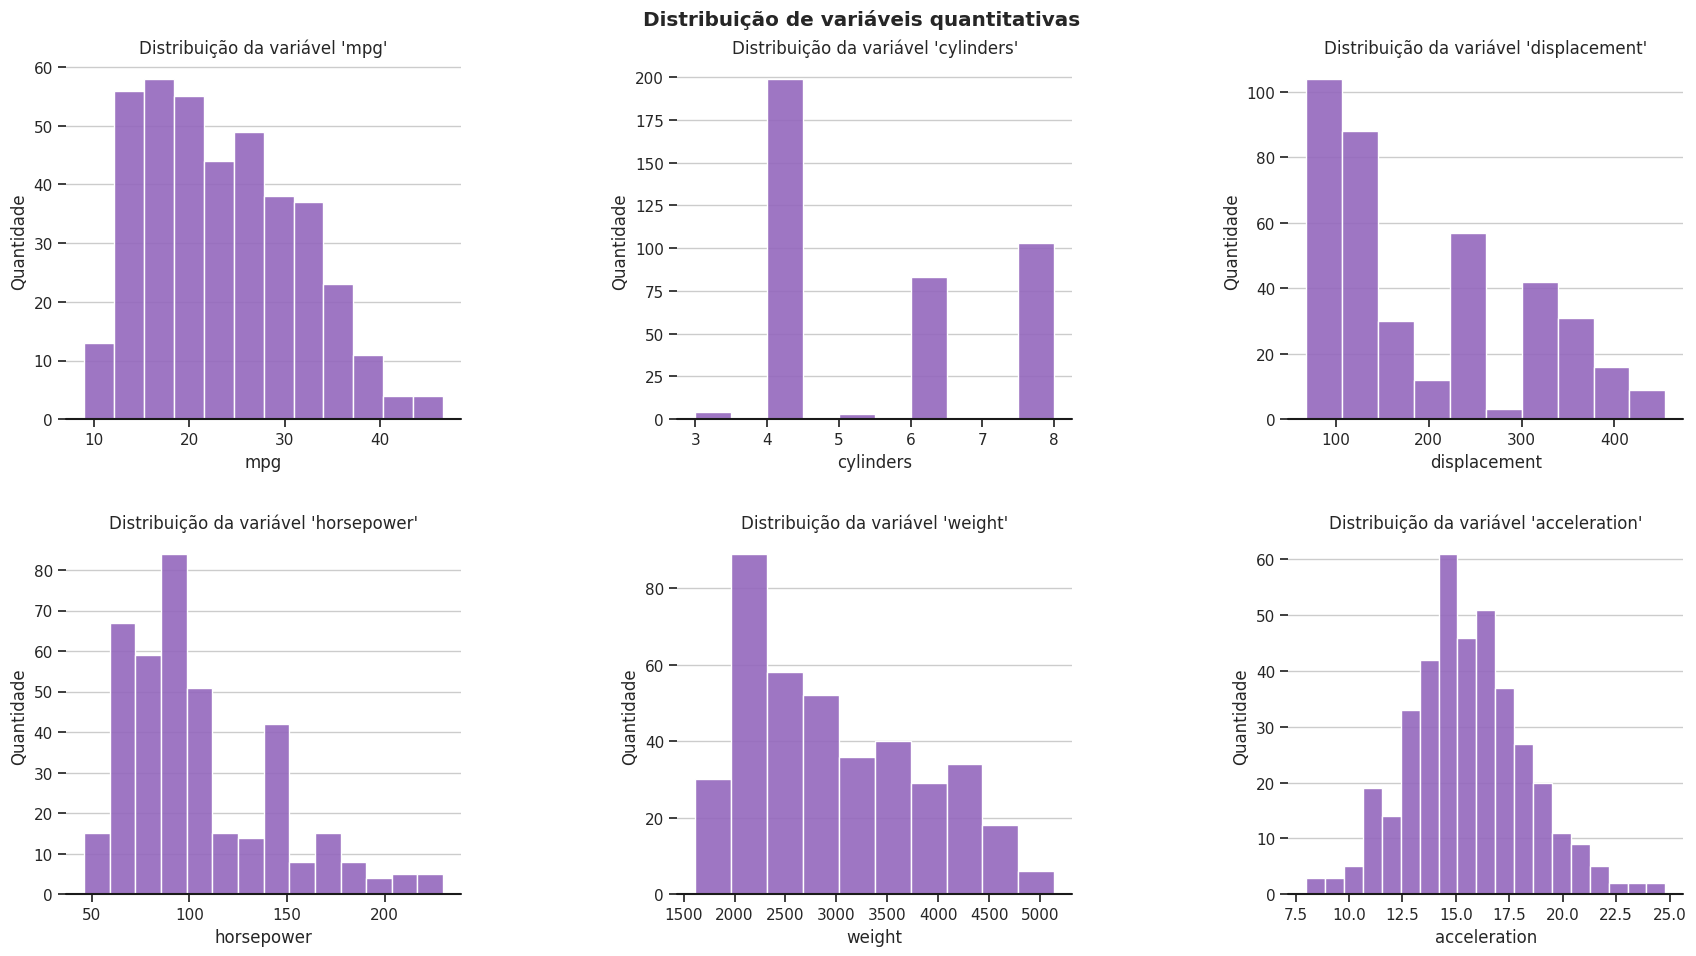

In [86]:
variaveis_plot = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']
variaveis_quantitativas = dicionario.query("tipo == 'quantitativa' and variavel in @variaveis_plot")

# Criando os gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

for i, variavel in enumerate(variaveis_quantitativas['variavel']):
    row = i // 3
    col = i % 3
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes[row, col],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

---
A partir das visualizações acima podemos dizer que:

* A distribuição da eficiência de combustível (`mpg`) mostra que a maioria dos carros tem um consumo de combustível entre 10 e 20 milhas por galão.
* A maioria dos carros possui 4 ou 8 cilindros (`cylinders`).
* Há um pico significativo em torno de 100 e outro em torno de 250 nas milhas percorridas (`displacement`) dos carros.
* A maioria dos carros tem potência entre 50 e 100 cavalos (`horsepower`).
* A distribuição de peso (`weight`) dos carros tende a apresentar massa entre 1500 a 2500lb.
* Existe um pico notável na faixa de 12,5 a 17,5 segundos para a aceleração (`acceleration`) dos carros.
---

### A eficiência de combustível está correlacionada com a potência do motor nos carros?

### Existe uma relação significativa entre o número de cilindros e a potência do motor?

### Carros mais pesados tendem a ter uma aceleração mais lenta?

## 3. Insights